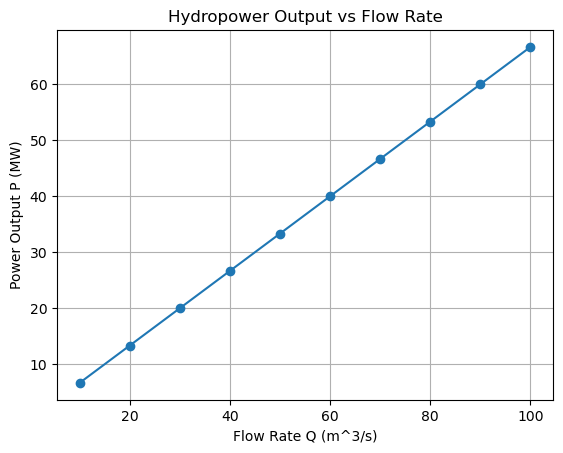

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rho = 1000       # kg/m^3
g = 9.81         # m/s^2
eta = 0.85       # overall efficiency
H = 80           # head in meters
Q = np.linspace(10, 100, 10)  # flow rate from 10 to 100 m^3/s

# Power calculation
P = eta * rho * g * Q * H / 1e6  # MW

# Plot
plt.plot(Q, P, marker='o')
plt.xlabel("Flow Rate Q (m^3/s)")
plt.ylabel("Power Output P (MW)")
plt.title("Hydropower Output vs Flow Rate")
plt.grid(True)
plt.show()

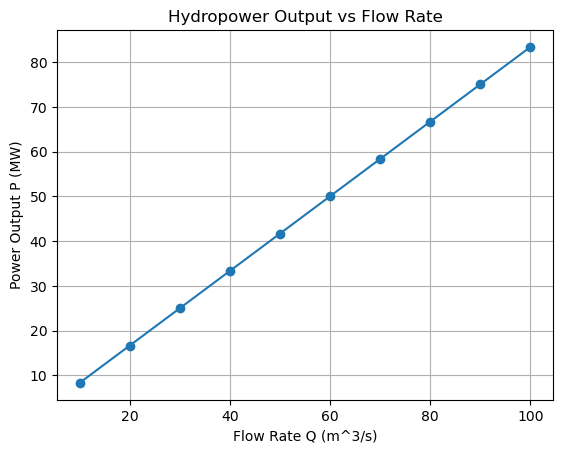

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rho = 1000       # kg/m^3
g = 9.81         # m/s^2
eta = 0.85      # overall efficiency
H = 100           # head in meters
Q = np.linspace(10, 100, 10)  # flow rate from 10 to 100 m^3/s

# Power calculation
P = eta * rho * g * Q * H / 1e6  # MW

# Plot
plt.plot(Q, P, marker='o')
plt.xlabel("Flow Rate Q (m^3/s)")
plt.ylabel("Power Output P (MW)")
plt.title("Hydropower Output vs Flow Rate")
plt.grid(True)
plt.show()


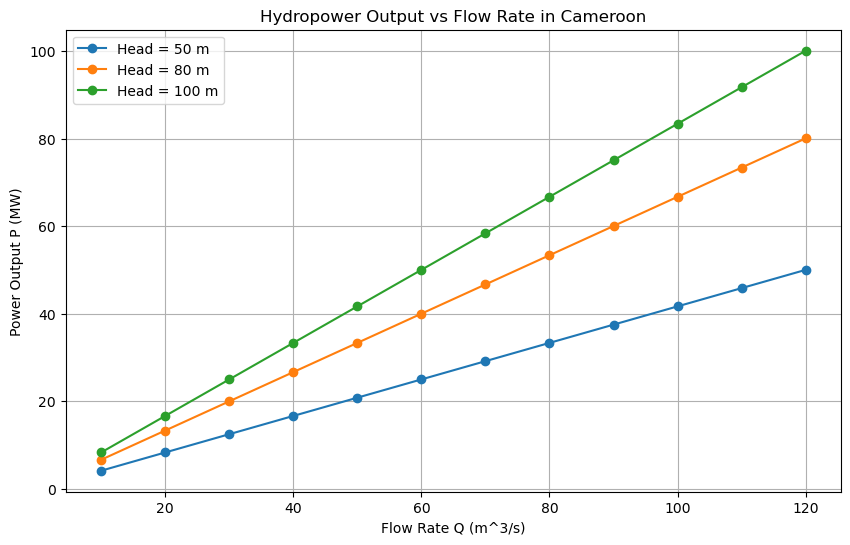

In [3]:
import numpy as np
import matplotlib.pyplot as plt


rho = 1000      # This is water density (kg/m^3)
g = 9.81        # Gravitational force (m/s^2)
eta = 0.85      # Overall efficiency (turbine + generator)

heads = [50, 80, 100]                     # Example head heights
flow_rates = np.linspace(10, 120, 12)     # Flow rates from 10 to 120 m^3/s

plt.figure(figsize=(10,6))

for H in heads:
    P = eta * rho * g * flow_rates * H / 1e6   # Power in MW
    plt.plot(flow_rates, P, marker='o', label=f'Head = {H} m')

plt.title("Hydropower Output vs Flow Rate in Cameroon")
plt.xlabel("Flow Rate Q (m^3/s)")
plt.ylabel("Power Output P (MW)")
plt.grid(True)
plt.legend()
plt.show()


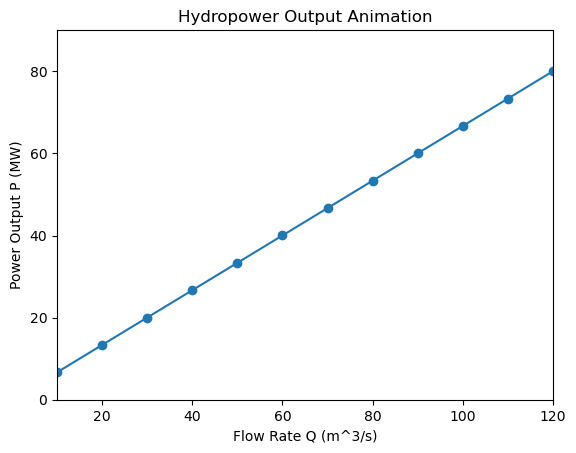

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Example: animate power vs flow rate
rho, g, eta, H = 1000, 9.81, 0.85, 80
Q = np.linspace(10, 120, 12)
P = eta * rho * g * Q * H / 1e6

fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-')
ax.set_xlim(10, 120)
ax.set_ylim(0, max(P)+10)
ax.set_xlabel("Flow Rate Q (m^3/s)")
ax.set_ylabel("Power Output P (MW)")
ax.set_title("Hydropower Output Animation")

def animate(i):
    line.set_data(Q[:i+1], P[:i+1])
    return line,

ani = FuncAnimation(fig, animate, frames=len(Q), interval=500)
ani.save("hydropower_sim.mp4", writer="ffmpeg")
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter


rho = 1000      
g = 9.81        
eta = 0.85      

heads = [50, 80, 100]                     
flow_rates = np.linspace(10, 120, 12)    

power_data = {}
for H in heads:
    P = eta * rho * g * flow_rates * H / 1e6   
    power_data[H] = P

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlim(min(flow_rates)-5, max(flow_rates)+5)
ax.set_ylim(0, max(power_data[100]) + 20)
ax.set_title("Hydro-electric power Output vs Flow Rate in Cameroon", fontsize=14)
ax.set_xlabel("Flow Rate Q (m³/s)")
ax.set_ylabel("Power Output P (MW)")
ax.grid(True)

lines = {}
for H in heads:
    (line,) = ax.plot([], [], marker='o', label=f'Head = {H} m')
    lines[H] = line

ax.legend()

frames_per_line = 100  
total_frames = frames_per_line * len(heads)

def animate(frame):
    head_index = frame // frames_per_line
    progress = frame % frames_per_line
    if head_index >= len(heads):
        return lines.values()
    
    H = heads[head_index]
    n_points = int(progress / frames_per_line * len(flow_rates))
    if n_points < 1:
        n_points = 1
    lines[H].set_data(flow_rates[:n_points], power_data[H][:n_points])
    return lines.values()

duration = 60  
fps = total_frames / duration
ani = FuncAnimation(fig, animate, frames=total_frames, interval=1000/fps, blit=True)

writer = FFMpegWriter(fps=fps)
ani.save("hydropower_output.mp4", writer=writer)

plt.close(fig)

